# **PART 4:** Visualizing results

For this part, we will use the `ClusterRepertoireVisualization` class from the TCRexplore package. After installing and activating the conda environment, we can import the necessary classes:

In [1]:
import pandas as pd
import numpy as np

from tcrexplore.analysis import Cluster, ClusterRepertoire
from tcrexplore.visualization import ClusterRepertoireVisualization

## Reading in the data

The `ClusterRepertoire` class will contain our data, which can be seen as a collection of `Cluster` objects. This data can be passed manually, but the class also contains useful alternative constructors to read it from a ClusTCR result object, _or a TCRex output file (todo)_.

In [ ]:
# TODO 
ClusterRepertoire.from_tcrex_result()

Read in the data manually:

In [2]:
df=pd.read_csv('../data/results/clustcr/P1_15_clusters_tcrex.tsv', sep="\t")
df.head()

,duplicate_count,frequency,junction_aa,v_call,j_call,cluster,cluster.1,epitope
0,1480.0,0.000769,CASSDRSGGADEQFF,TRBV6-4*00,TRBJ2-1*00,265.0,265.0,NaN
1,857.0,0.000445,CASSEDPRLQRDEQFF,TRBV6-1*00,TRBJ2-1*00,121.0,121.0,NaN
2,687.0,0.000357,CASSDSPTGAYGYTF,TRBV6-1*00,TRBJ1-2*00,504.0,504.0,NaN
3,558.0,0.000290,CASSERENTEAFF,TRBV6-4*00,TRBJ1-1*00,613.0,613.0,NaN
4,3.0,0.000002,CASSERENTEAFF,TRBV6-1*00,TRBJ1-1*00,613.0,613.0,NaN


In [15]:
# a helper function to aggregate epitope information:

from typing import Counter, Iterable

def agg_epitopes(epitopes:Iterable[str]) -> Counter:
    epitopes = [e for e in epitopes if not pd.isna(e)]
    if len(epitopes) == 0:
        return np.nan
    return Counter(epitopes)

We group the CDR3 sequences for each ClusTCR cluster:

In [25]:
clusters_df = df.groupby("cluster").agg({"junction_aa":set, "epitope":agg_epitopes})
clusters_df["cluster_id"] = [int(x) for x in clusters_df.index]
clusters_df["most_common_epitope"] = clusters_df["epitope"].apply(lambda x : x.most_common()[0][0] if not pd.isna(x) else np.nan)
clusters_df.head()

,junction_aa,epitope,cluster_id,most_common_epitope
cluster,,,,
0.0,"{CASSYSPGGALETQYF, CASSYSSGGALETQYF}",NaN,0,NaN
1.0,"{CASSYRGQSLNQPQHF, CASSYRGQGLNQPQHF}",NaN,1,NaN
2.0,"{CASSDSGGSGTDTQYF, CASSDSGGGGTDTQYF, CASSDSGGW...",NaN,2,NaN
3.0,"{CASSYSGTSSYNEQFF, CASSYSGYSSYNEQFF, CASSYLGPP...",NaN,3,NaN
4.0,"{CGSSDSGAGSYNEQFF, CASSDSTSGDYNEQFF, CASSYSGGA...",NaN,4,NaN


... and create the `ClusterRepertoire` object:

In [5]:
clusterlist = [
        Cluster(sequences=seqs, cluster_id=cid, k="all") 
        for seqs,cid in zip(clusters_df["junction_aa"], clusters_df["cluster_id"])
    ]

In [13]:
c_rep = ClusterRepertoire(clusterlist)

## Visualize!

After these preprocessing steps, we can start exploring our data. Let's first see if there are any TCR clusters enriched for epitope X

A motif logo of cluster CDR3 sequences can easily be plotted from its `Cluster` object:

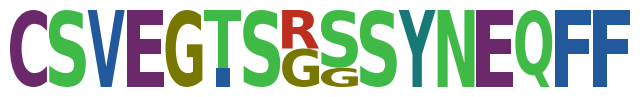

In [33]:
# get a cluster from the repertoire by id using .get:
c = c_rep.get(5000)

# plot
c.plot_motif_logo()

By default, the letter height corresponds to the relative frequencies of this
amino acid at each position in the cluster. 

By passing `method = 'information'`, the letter height is determined by the
self-information of an AA compared to a large synthetic background of sequences.
This can be interpreted as "how surprising is this AA on this position, on
average?". 

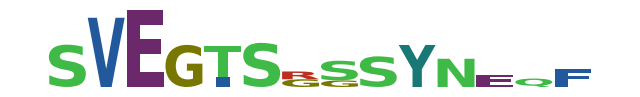

In [36]:
# get a cluster from the repertoire by id using .get:
c = c_rep.get(5000)

# plot
c.plot_motif_logo(method="information")

Other color schemes are available, their names can be found [here](https://logomaker.readthedocs.io/en/latest/examples.html#color-schemes).

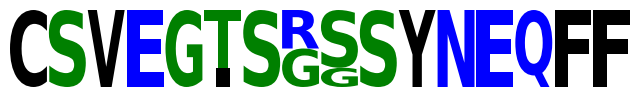

In [40]:
# get a cluster from the repertoire by id using .get:
c = c_rep.get(5000)

# plot
c.plot_motif_logo(color_scheme="hydrophobicity")